<a href="https://colab.research.google.com/github/Dimple626/21Projects-ML-DL-GenAI-/blob/main/Time_Day_Series6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Time Series Analysis & Forecasting 📈

### **Theoretical Concept: What is a Time Series?**

A time series is a sequence of data points collected or recorded at specific time intervals (e.g., daily, monthly, yearly). Unlike other datasets we've worked with, the order of data points in a time series is critical.

A time series can be broken down into several components:
1.  **Trend:** The long-term upward or downward movement in the data.
2.  **Seasonality:** A repeating, predictable pattern over a fixed period (e.g., sales are higher every December).
3.  **Cyclical Component:** Patterns that occur at irregular, non-fixed intervals (e.g., business cycles). This is often harder to model and is sometimes combined with the trend.
4.  **Residuals (or Noise):** The random, irregular fluctuations that are left over after the other components have been removed.

In [1]:
pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set plot style and size
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [4]:
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Step 2: Exploratory Data Analysis & Decomposition

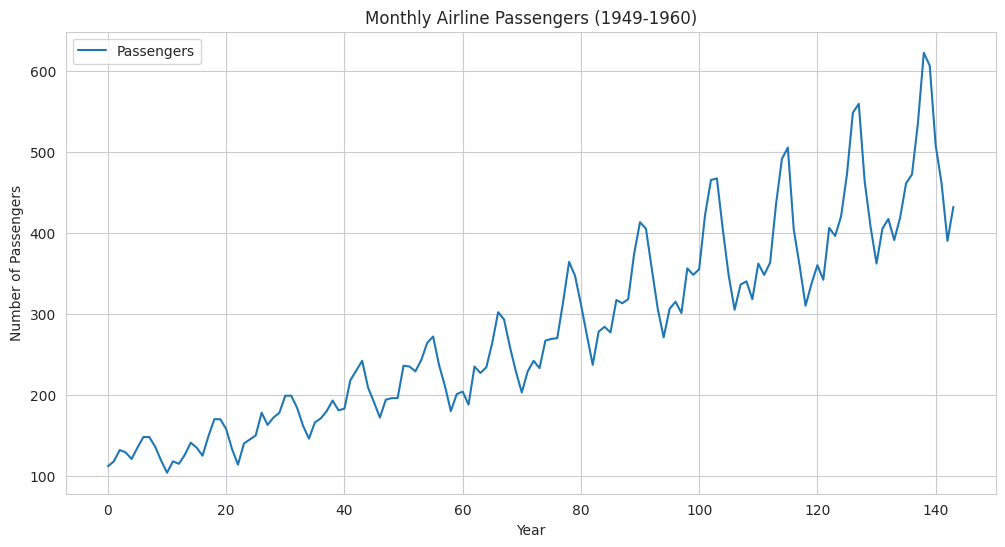

In [5]:
df.plot()
plt.title('Monthly Airline Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

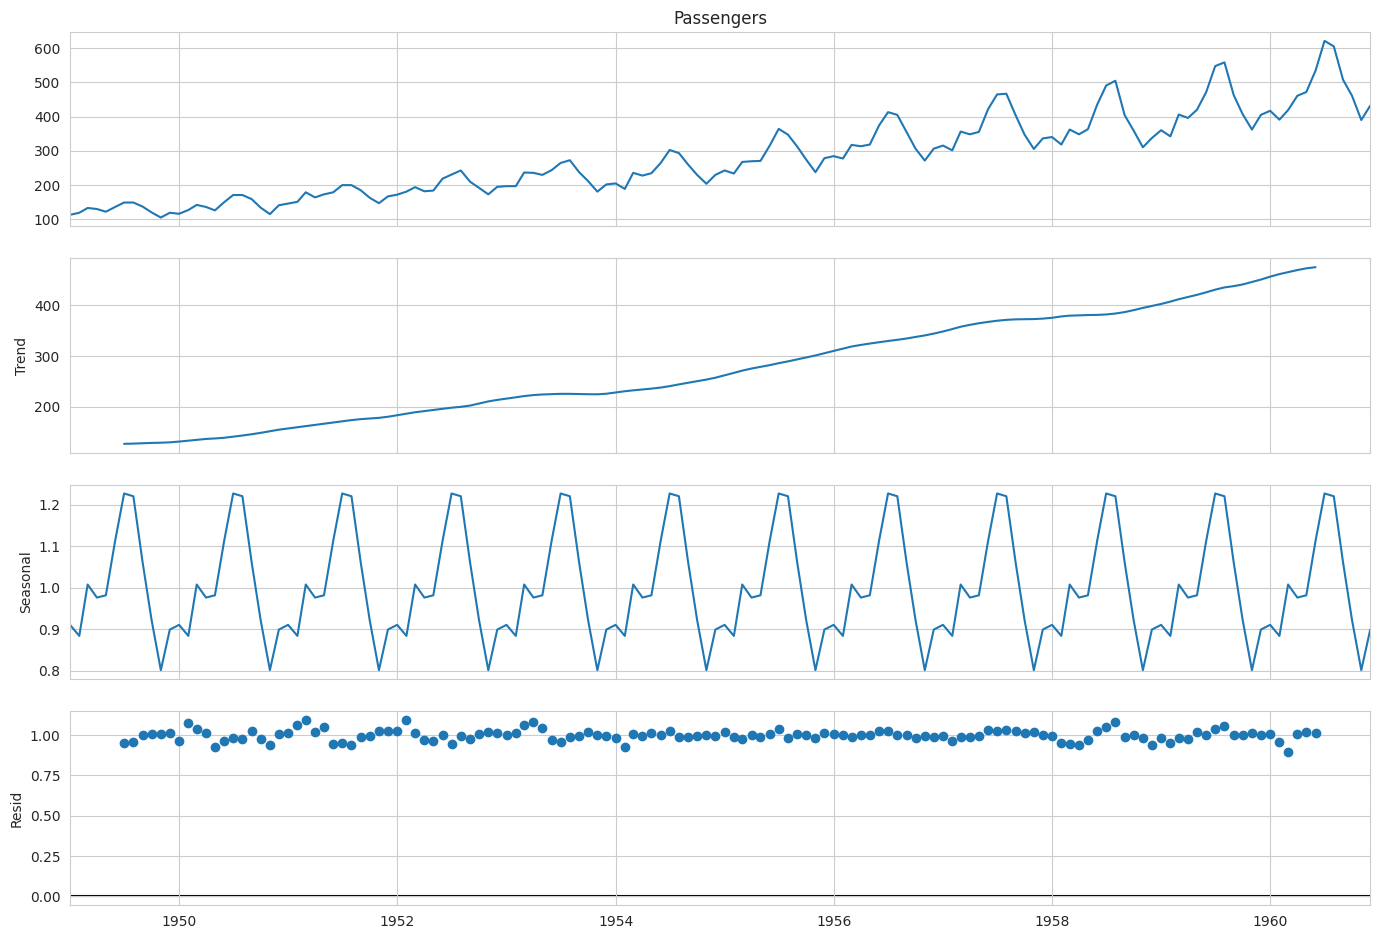

In [6]:
# Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Decompose the time series to visualize its components
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

### Step 3: Stationarity Testing
Before we can build a model like ARIMA, the time series needs to be **stationary**.

#### **Theoretical Concept: Stationarity**
A time series is said to be stationary if its statistical properties—specifically the **mean**, **variance**, and **autocorrelation**—are all constant over time.

- **Why is it important?** Stationary series are easier to model and forecast. If a series is stationary, its past behavior is a good predictor of its future behavior. Our passenger data is clearly **non-stationary** because its mean (the trend is increasing) and variance (the seasonal swings are growing) are not constant.

**How to test for it?**
1.  **Visual Inspection:** Look at the plot. Is there a clear trend or seasonality?
2.  **Statistical Tests:** The **Augmented Dickey-Fuller (ADF) Test** is a common statistical test.
    - **Null Hypothesis ($H_0$):** The series is non-stationary.
    - **Alternative Hypothesis ($H_1$):** The series is stationary.

We want to **reject the null hypothesis**. To do this, we need the **p-value** from the test to be less than a significance level (e.g., 0.05).

ADF Statistic: 0.8153688792060498, p-value: 0.991880243437641
Series is non-stationary, applying transformations...
ADF Statistic (diff 1): -2.717130598388114, p-value: 0.07112054815086184
ADF Statistic (diff 2): -8.19662913218224, p-value: 7.419304549376186e-13
Series stationary after differencing 2 times


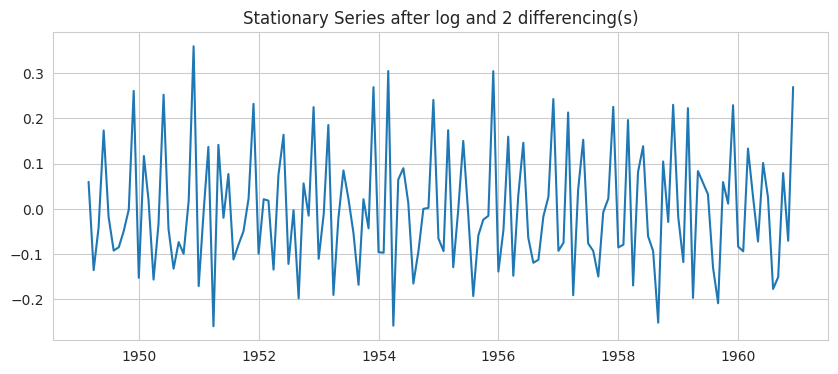

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 117.093
Date:                Sat, 25 Oct 2025   AIC                           -228.186
Time:                        08:02:56   BIC                           -219.318
Sample:                    01-01-1949   HQIC                          -224.582
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2104      0.111      1.889      0.059      -0.008       0.429
ma.L1         -0.9989      1.242     -0.805      0.421      -3.432       1.435
sigma2         0.0109      0.014      0.796      0.4

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load your time series data (update to your actual path and column names)
df = pd.read_csv('21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Check original stationarity
result = adfuller(df['Passengers'])
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")
if result[1] > 0.05:
    print("Series is non-stationary, applying transformations...")

# Log transform and difference until stationary (p-value < 0.05)
df_log = np.log(df['Passengers'])
df_diff = df_log.diff().dropna()

for i in range(1, 4):
    adf_test = adfuller(df_diff)
    print(f"ADF Statistic (diff {i}): {adf_test[0]}, p-value: {adf_test[1]}")
    if adf_test[1] < 0.05:
        print(f"Series stationary after differencing {i} times")
        break
    df_diff = df_diff.diff().dropna()

# Plot stationary series for visual confirmation
plt.figure(figsize=(10,4))
plt.plot(df_diff)
plt.title(f'Stationary Series after log and {i} differencing(s)')
plt.show()

# Train ARIMA model on the stationary series
# You can tune p,d,q, here p,d determined by PACF/ACF plots,
# For this example, we'll pick ARIMA(p=1, d=i, q=1)
model = ARIMA(df_log, order=(1, i, 1))  # Use 'i' as the differencing order found earlier
model_fit = model.fit()

print(model_fit.summary())

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
# Undo log transformation for forecasts
forecast_passengers = np.exp(forecast)

print("Next 12 months forecast (original scale):")
print(forecast_passengers)


## **Theoretical Concept: ARIMA**
**AutoRegressive Integrated Moving Average (ARIMA)** models are a class of statistical models for analyzing and forecasting time series data. An ARIMA model is characterized by three parameters:

- **AR (Autoregressive) - p:** The number of lag observations included in the model. This term captures the relationship between the current observation and its past values.
- **I (Integrated) - d:** The number of times that the raw observations are differenced. This is done to make the time series stationary.
- **MA (Moving Average) - q:** The size of the moving average window. This term captures the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The model is typically denoted as **ARIMA(p, d, q)**.


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Series is NOT stationary. Applying transformation...
ADF Statistic (after 1 diff): -2.717130598388114
p-value (after 1 diff): 0.07112054815086184
ADF Statistic (after 2 diff): -8.19662913218224
p-value (after 2 diff): 7.419304549376186e-13
Series is stationary after 2 difference(s)


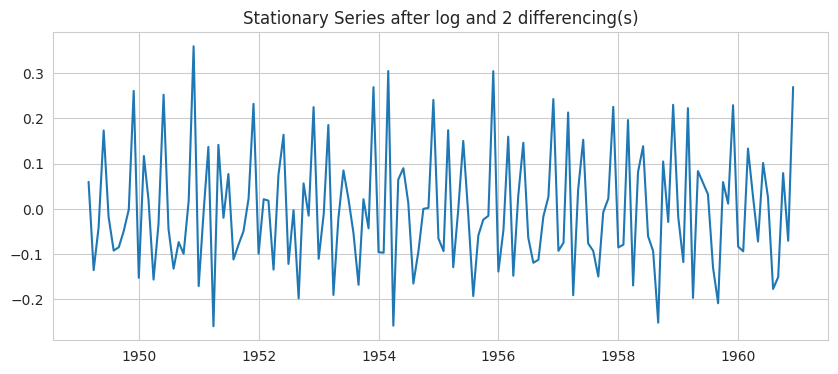


Training ARIMA...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 117.093
Date:                Sat, 25 Oct 2025   AIC                           -228.186
Time:                        08:04:41   BIC                           -219.318
Sample:                    01-01-1949   HQIC                          -224.582
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2104      0.111      1.889      0.059      -0.008       0.429
ma.L1         -0.9989      1.242     -0.805      0.421      -3.432       1.435
sigma2         0.0109      0.014      0.796      0.4

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load your time series dataset
# EXAMPLE: If you have a column 'Month' and 'Passengers'
df = pd.read_csv('21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# STEP 1: Check stationarity using Augmented Dickey-Fuller Test
result = adfuller(df['Passengers'])
print('\nADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print('Series is stationary! No further transformation needed.')
    stationary_series = df['Passengers']
else:
    print('Series is NOT stationary. Applying transformation...')

    # STEP 2: Apply log and difference transformations until stationary
    stationary_series = np.log(df['Passengers'])
    diff_ct = 0
    for i in range(3):  # up to 3 differencing iterations
        stationary_series = stationary_series.diff().dropna()
        diff_ct += 1
        adf_result_next = adfuller(stationary_series)
        print(f"ADF Statistic (after {diff_ct} diff): {adf_result_next[0]}")
        print(f"p-value (after {diff_ct} diff): {adf_result_next[1]}")
        if adf_result_next[1] < 0.05:
            print(f"Series is stationary after {diff_ct} difference(s)")
            break

    # Optional: Plot to visually confirm stationarity
    plt.figure(figsize=(10,4))
    plt.plot(stationary_series)
    plt.title(f'Stationary Series after log and {diff_ct} differencing(s)')
    plt.show()

# STEP 3: Train the ARIMA model
print("\nTraining ARIMA...")
# Use ARIMA(p=1, d=diff_ct, q=1) as an example; tune as needed
model = ARIMA(np.log(df['Passengers']), order=(1, diff_ct, 1))
model_fit = model.fit()
print(model_fit.summary())

# STEP 4: Forecasting
steps = 12  # forecast next 12 months
forecast = model_fit.forecast(steps=steps)
forecast_passengers = np.exp(forecast) # convert back from log scale

print("\nNext 12 months forecast (original scale):")
print(forecast_passengers)


### Step 7: Building a SARIMA Model for Seasonality

#### **Theoretical Concept: SARIMA**
**Seasonal AutoRegressive Integrated Moving Average (SARIMA)** is an extension of ARIMA that explicitly models the seasonal component.

It is written as **SARIMA(p, d, q)(P, D, Q, m)**, where:
- `(p, d, q)` are the non-seasonal parameters:
    - **p (non-seasonal AR order):** The number of non-seasonal lagged observations included in the model.
    - **d (non-seasonal differencing order):** The number of times the data is differenced to remove non-seasonal trend.
    - **q (non-seasonal MA order):** The number of non-seasonal lagged forecast errors included in the model.

- `(P, D, Q, m)` are the seasonal parameters:
    - **P (seasonal AR order):** The number of seasonal lagged observations included in the model.
    - **D (seasonal differencing order):** The number of times the data is differenced seasonally to remove seasonal trend.
    - **Q (seasonal MA order):** The number of seasonal lagged forecast errors included in the model.
    - **m (number of periods in a season):** The number of time steps for a single seasonal period (e.g., `m=12` for monthly data with an annual seasonality, `m=4` for quarterly data).

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
ADF Statistic (diff 1): -2.717130598388114
p-value (diff 1): 0.07112054815086184
ADF Statistic (diff 2): -8.19662913218224
p-value (diff 2): 7.419304549376186e-13
Series is stationary after 2 diff(s)


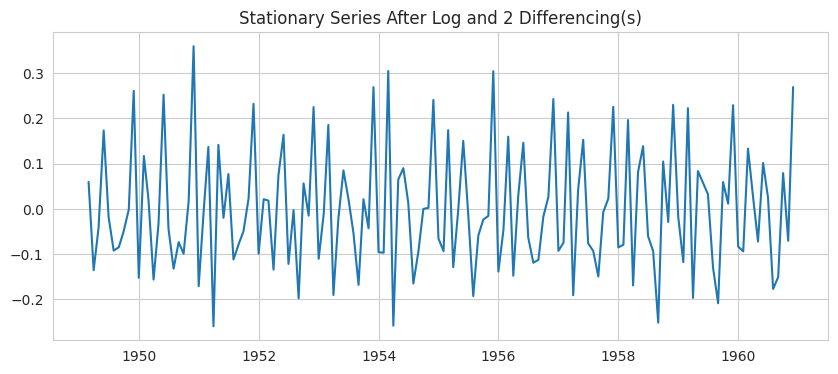

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                 213.049
Date:                            Sat, 25 Oct 2025   AIC                           -416.098
Time:                                    08:09:38   BIC                           -402.330
Sample:                                01-01-1949   HQIC                          -410.509
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3918      0.071     -5.529      0.000      -0.531      -0.253
ma.L1         -1.0000     41.954   

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your data (change file/col names if needed)
df = pd.read_csv('21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Check stationarity with ADF
result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    stationary_series = df['Passengers']
    diff_ct = 0
    print('Series is stationary')
else:
    stationary_series = np.log(df['Passengers'])
    diff_ct = 0
    for i in range(3):  # up to 3 differencing
        stationary_series = stationary_series.diff().dropna()
        diff_ct += 1
        adf_out = adfuller(stationary_series)
        print(f'ADF Statistic (diff {diff_ct}):', adf_out[0])
        print(f'p-value (diff {diff_ct}):', adf_out[1])
        if adf_out[1] < 0.05:
            print(f'Series is stationary after {diff_ct} diff(s)')
            break

# Optional: Visual confirmation
plt.figure(figsize=(10,4))
plt.plot(stationary_series)
plt.title(f'Stationary Series After Log and {diff_ct} Differencing(s)')
plt.show()

# Fit SARIMA model (seasonal order for monthly data: 12)
# Typical order for seasonal data: (p,d,q)(P,D,Q,s)
# Here, let's use ARIMA(1,diff_ct,1) × (1,1,1,12) as a standard starting point
model = SARIMAX(np.log(df['Passengers']),
                order=(1, diff_ct, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()
print(model_fit.summary())

# Forecast the next 12 months
steps = 12
forecast_log = model_fit.forecast(steps=steps)
forecast = np.exp(forecast_log)  # Convert back from log scale

# Show results
print('\nNext 12 months forecast (SARIMA, original scale):')
print(forecast)
